## ML

### 径向基函数核支持向量回归(SVR.rbf)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

In [1]:
# 读取数据
data = pd.read_excel("./database/solvus_all.xlsx")

NameError: name 'pd' is not defined

In [4]:
data_new = data.drop(['DOIs','material','Unit','other_property_info'], axis=1, inplace=False)   
# axis=1为列
data_new.fillna(0, inplace=True)

In [2]:
# 删除全为0的列
all0_col = data_new.columns[data_new.eq(0).all()]
data_new = data_new.drop(all0_col, axis=1, inplace=False)   # axis=1为列

NameError: name 'data_new' is not defined

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new['y_std'] = scaler.fit_transform(data_new[["y"]])
data_new = data_new.drop(['y'], axis=1, inplace=False)   
data_new

,Co,Al,W,Ni,Ti,Cr,Ta,B,Mo,Re,Nb,V,Zr,Er,Hf,C,y_std
0,10.00,6.50,0.00,65.500,0.00,3.00,5.00,0.000,7.00,3.00,0.0,0,0.000,0,0.00,0.000,0.594251
1,0.00,6.61,6.11,72.170,0.00,0.00,8.38,0.000,0.00,6.25,0.0,0,0.000,0,0.00,0.000,1.084666
2,2.20,5.74,5.60,67.576,0.23,3.30,8.40,0.002,0.41,6.40,0.1,0,0.001,0,0.04,0.001,1.137210
3,2.39,3.48,9.19,56.860,0.16,1.10,6.49,0.000,0.79,19.54,0.0,0,0.000,0,0.00,0.000,0.080484
4,2.00,5.60,6.37,64.440,0.45,0.93,13.45,0.000,0.74,6.02,0.0,0,0.000,0,0.00,0.000,0.495001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,81.10,8.60,6.60,0.000,2.00,0.00,1.70,0.000,0.00,0.00,0.0,0,0.000,0,0.00,0.000,-0.357386
138,80.00,7.00,8.00,0.000,4.00,0.00,1.00,0.000,0.00,0.00,0.0,0,0.000,0,0.00,0.000,-0.158885
139,80.00,7.00,7.00,0.000,4.00,0.00,2.00,0.000,0.00,0.00,0.0,0,0.000,0,0.00,0.000,-0.007090
140,80.00,6.00,6.00,0.000,6.00,0.00,2.00,0.000,0.00,0.00,0.0,0,0.000,0,0.00,0.000,0.150543


In [8]:
# 提取特征和标签
X = data_new.iloc[:,:16] 
y = data_new.iloc[:,16]

In [9]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=666)

<hr style="border: 1px solid ;">

In [12]:
# 构建支持向量回归模型
svr_rbf = SVR(kernel='rbf',C=1e3, gamma=0.01)
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)

In [13]:
# 进行网格搜索  "kernel": ["poly", "rbf", "sigmoid"],"C": [0.1, 1, 10, 100, 1000],"gamma": [1e-7, 1e-4, 1e-3, 1e-2]
param_grid = {"C": [0.1, 1, 10, 100, 1000],                    
              "gamma": [1e-7, 1e-4, 1e-3, 1e-2]}
gs = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01]},
             verbose=1)

In [14]:
y_pred = gs.predict(X_test)
gs.best_estimator_

SVR(C=10, gamma=0.01)

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("均方误差（MSE）:", mse)
print("均方根误差（rMSE）:", rmse)
print("R方（决定系数）:", r2)

均方误差（MSE）: 0.17402520922611117
均方根误差（rMSE）: 0.4171632884448381
R方（决定系数）: 0.8837110483061469


In [17]:
from sklearn.metrics import mean_absolute_error

# 计算 MAE
mae = mean_absolute_error(y_test, y_pred)
mae

0.27740277985423845

In [59]:
# 显示所有拟合模型的参数设定
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002362,4.428016e-04,0.001786,0.000397,0.1,0.0,"{'C': 0.1, 'gamma': 1e-07}",-0.037785,-0.288170,-0.006994,0.000891,0.003595,-0.065693,0.112209,20
1,0.002201,4.137903e-04,0.001988,0.000622,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.705041,0.606519,0.639317,0.648941,0.692346,0.658433,0.035980,14
2,0.001995,2.120098e-05,0.001396,0.000488,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.743042,0.586161,0.645367,0.686146,0.724823,0.677108,0.056541,11
3,0.001997,2.618118e-05,0.001399,0.000473,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.702277,0.472160,0.584235,0.634999,0.637630,0.606260,0.076808,15
4,0.001995,1.219436e-06,0.001788,0.000395,1,0.0,"{'C': 1, 'gamma': 1e-07}",0.014944,-0.206916,0.041938,0.047453,0.060252,-0.008466,0.100320,19
5,0.001795,3.988505e-04,0.001396,0.000489,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.785446,0.637071,0.678395,0.827591,0.726115,0.730924,0.069149,9
6,0.001995,2.431402e-07,0.001596,0.000489,1,0.001,"{'C': 1, 'gamma': 0.001}",0.856155,0.683179,0.699141,0.792504,0.703836,0.746963,0.066651,8
7,0.002784,3.946321e-04,0.001405,0.000499,1,0.01,"{'C': 1, 'gamma': 0.01}",0.872411,0.656462,0.698864,0.774859,0.813828,0.763285,0.077664,6
8,0.002590,4.862128e-04,0.001200,0.000397,10,0.0,"{'C': 10, 'gamma': 1e-07}",0.382593,0.357785,0.392951,0.358941,0.424341,0.383322,0.024586,17
9,0.002115,4.623078e-04,0.001795,0.000399,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.841676,0.688645,0.715878,0.863316,0.733381,0.768579,0.070319,4


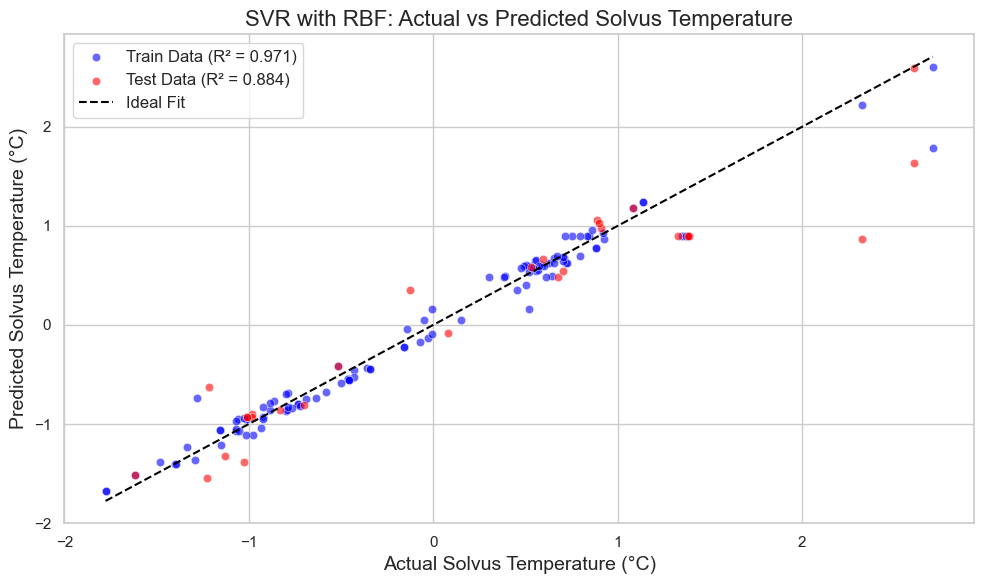

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 假设 X_train 和 y_train 是训练数据，X_test 和 y_test 是测试数据
# 训练线性回归模型
svr_rbf = SVR(kernel='rbf',C=10, gamma=0.01)
svr_rbf.fit(X_train, y_train)

# 预测
y_train_pred = svr_rbf.predict(X_train)
y_test_pred = svr_rbf.predict(X_test)

# 计算 R² 分数
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 设置 seaborn 主题
sns.set_theme(style="whitegrid", palette="pastel")

# 创建画布
plt.figure(figsize=(10, 6))

# 绘制训练数据的散点图
sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label=f'Train Data (R² = {train_r2:.3f})', alpha=0.6)

# 绘制测试数据的散点图
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label=f'Test Data (R² = {test_r2:.3f})', alpha=0.6)

# 绘制拟合曲线
min_val = min(np.min(y_train), np.min(y_test))
max_val = max(np.max(y_train), np.max(y_test))
line = np.linspace(min_val, max_val, 100)
plt.plot(line, line, color='black', linestyle='--', label='Ideal Fit')

# 添加标题和标签
plt.title('SVR with RBF: Actual vs Predicted Solvus Temperature', fontsize=16)
plt.xlabel('Actual Solvus Temperature (°C)', fontsize=14)
plt.ylabel('Predicted Solvus Temperature (°C)', fontsize=14)

# 添加图例
plt.legend(fontsize=12)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

### 线性核支持向量回归(SVR.lin)

In [18]:
# 构建支持向量回归模型
svr_rbf = SVR(kernel='linear',C=15, gamma=0.01)
svr_rbf.fit(X_train, y_train)
y2_pred = svr_rbf.predict(X_test)

In [20]:
# 进行网格搜索  "kernel": ["poly", "rbf", "sigmoid"],"C": [0.1, 1, 10, 100, 1000],"gamma": [1e-7, 1e-4, 1e-3, 1e-2]
param_grid = {"C": [0.1, 1, 10, 100, 1000],                    
              "gamma": [1e-7, 1e-4, 1e-3, 1e-2]}
gs = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1e-07, 0.0001, 0.001, 0.01]},
             verbose=1)

In [21]:
y_pred = gs.predict(X_test)
gs.best_estimator_

SVR(C=0.1, gamma=1e-07, kernel='linear')

In [22]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("均方误差（MSE）:", mse)
print("均方根误差（rMSE）:", rmse)
print("R方（决定系数）:", r2)

均方误差（MSE）: 0.38249377981358734
均方根误差（rMSE）: 0.61846081509954
R方（决定系数）: 0.7444059922022626


In [23]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.3739248453317002

### 线性回归、岭回归、lasso回归

* 线性回归

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
print(lr.coef_)

[-5.62895056e-02  1.92941212e-02 -3.75573849e-02 -3.25221162e-02
  5.36166260e-02 -4.25903643e-02  5.51553618e-03 -1.76457134e+01
 -6.43174267e-02 -7.66569662e-03 -2.62013834e-01 -1.32493175e-01
 -5.23927958e-02 -2.87324201e-02 -2.12360340e-01  7.39028649e-01]


In [76]:
W = pd.DataFrame(index=X.columns)
w_lr = []
w_lr.extend(lr.coef_)
# w_lr.append(lr.intercept_)
W["linear_w"] = w_lr
W.round(decimals=2)

,linear_w
Co,-0.06
Al,0.02
W,-0.04
Ni,-0.03
Ti,0.05
Cr,-0.04
Ta,0.01
B,-17.65
Mo,-0.06
Re,-0.01


In [77]:
X_train_array = X_train.values.reshape(-1,1)  # 或 X_train.to_numpy()
y_train_array = y_train.values  # 或 y_train.to_numpy()

* 岭回归

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1e-5)
ridge.fit(X_train,y_train)

Ridge(alpha=1e-05)

In [26]:
y_test_pred_ridge = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred_ridge))

0.7845037324426021


In [82]:
w_ridge = []
w_ridge.extend(ridge.coef_)
W["ridge_w"] = w_ridge
W.round(decimals=2)

,linear_w,ridge_w
Co,-0.06,-0.06
Al,0.02,0.02
W,-0.04,-0.04
Ni,-0.03,-0.03
Ti,0.05,0.05
Cr,-0.04,-0.04
Ta,0.01,0.01
B,-17.65,-17.30
Mo,-0.06,-0.06
Re,-0.01,-0.01


In [83]:
# 岭迹分析
alphas = np.logspace(-10,10,20)
coef = pd.DataFrame()
for alpha in alphas:
    ridge_clf =Ridge(alpha=alpha)
    ridge_clf.fit(X_train,y_train)
    df= pd.DataFrame([ridge_clf.coef_],columns=X_train.columns)
    df['alpha'] = alpha
    coef = coef._append(df,ignore_index=True)
coef.round(decimals=2)

,Co,Al,W,Ni,Ti,Cr,Ta,B,Mo,Re,Nb,V,Zr,Er,Hf,C,alpha
0,-0.06,0.02,-0.04,-0.03,0.05,-0.04,0.01,-17.65,-0.06,-0.01,-0.26,-0.13,-0.05,-0.03,-0.21,0.74,0.000000e+00
1,-0.06,0.02,-0.04,-0.03,0.05,-0.04,0.01,-17.65,-0.06,-0.01,-0.26,-0.13,-0.05,-0.03,-0.21,0.74,0.000000e+00
2,-0.06,0.02,-0.04,-0.03,0.05,-0.04,0.01,-17.65,-0.06,-0.01,-0.26,-0.13,-0.05,-0.03,-0.21,0.74,0.000000e+00
3,-0.06,0.02,-0.04,-0.03,0.05,-0.04,0.01,-17.64,-0.06,-0.01,-0.26,-0.13,-0.05,-0.03,-0.21,0.74,0.000000e+00
4,-0.06,0.02,-0.04,-0.03,0.05,-0.04,0.01,-17.59,-0.06,-0.01,-0.26,-0.13,-0.05,-0.03,-0.22,0.74,0.000000e+00
5,-0.06,0.02,-0.04,-0.03,0.05,-0.04,0.01,-17.02,-0.06,-0.01,-0.26,-0.13,-0.05,-0.03,-0.24,0.75,0.000000e+00
6,-0.06,0.02,-0.04,-0.03,0.05,-0.04,0.00,-12.45,-0.06,-0.00,-0.27,-0.13,-0.05,-0.03,-0.47,0.83,0.000000e+00
7,-0.06,0.02,-0.05,-0.04,0.05,-0.04,0.00,-3.14,-0.06,0.01,-0.29,-0.13,-0.05,-0.03,-0.94,0.97,0.000000e+00
8,-0.06,0.02,-0.05,-0.04,0.05,-0.04,0.00,-0.39,-0.06,0.01,-0.29,-0.12,-0.05,-0.03,-1.04,0.69,3.000000e-02
9,-0.05,0.03,-0.05,-0.03,0.05,-0.04,0.02,-0.07,-0.06,0.02,-0.26,-0.11,-0.05,-0.03,-0.80,0.15,3.000000e-01


* lasso回归

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [28]:
y_test_pred_lasso = lasso.predict(X_test)
print(r2_score(y_test,y_test_pred_lasso))

0.7578722940212276


In [87]:
w_lasso = []
w_lasso.extend(lasso.coef_)
W["lasso_w"] = w_lasso
W.round(decimals=2)

,linear_w,ridge_w,lasso_w
Co,-0.06,-0.06,-0.03
Al,0.02,0.02,0.05
W,-0.04,-0.04,-0.02
Ni,-0.03,-0.03,-0.01
Ti,0.05,0.05,0.07
Cr,-0.04,-0.04,-0.01
Ta,0.01,0.01,0.04
B,-17.65,-17.30,-0.00
Mo,-0.06,-0.06,-0.03
Re,-0.01,-0.01,0.04


### 梯度增强回归

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
# 构建梯度增强回归模型
gbm = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, max_features='sqrt',
                          n_estimators=600, random_state=666)
gbm.fit(X_train, y_train)
y3_pred = gbm.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y3_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y3_pred)
print("均方误差（MSE）:", mse)
print("均方根误差（rMSE）:", rmse)
print("R方（决定系数）:", r2)

均方误差（MSE）: 0.18955846752371747
均方根误差（rMSE）: 0.4353831272841398
R方（决定系数）: 0.8733312514258483


In [38]:
from sklearn.metrics import mean_absolute_error

# 计算 MAE
mae = mean_absolute_error(y_test, y3_pred)
mae

0.2746978038470544

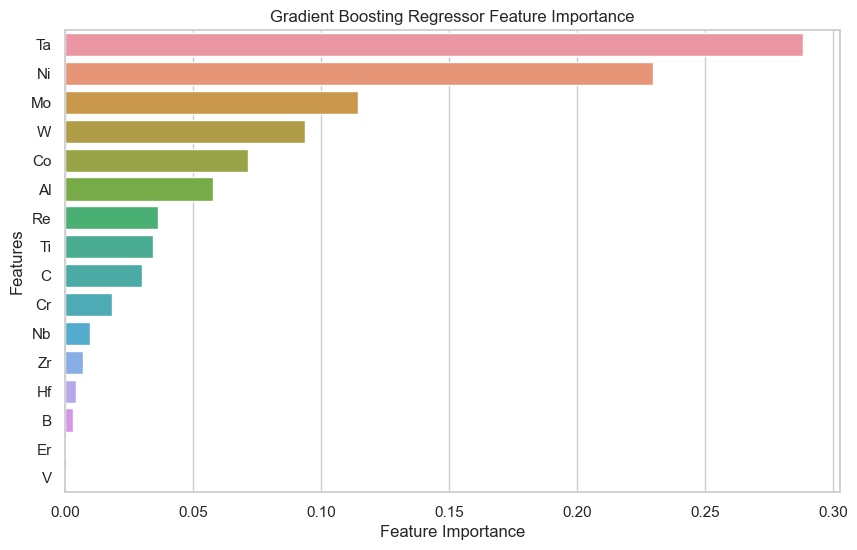

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = X.columns
feature_importance = gbm.feature_importances_    # 获取特征重要性

importance_df = pd.DataFrame({'Features': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)   # 排序
# 绘制水平条形图
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Regressor Feature Importance')
plt.show()

绘图

In [9]:
mean_shap_values = [3.98,5.21,1.54,0.31,3.14,2.74,0.82,0.53,0.74,1.38,
                   0.83,0.93,0.99,1.31,0.45,0.11][::-1]

In [10]:
feature_names = ['Ni','Ta','Co','Ti','W','Re','Mo', 'Al','Cr','C',
                 'Nb','Hf','Zr','B','Er','V'][::-1]

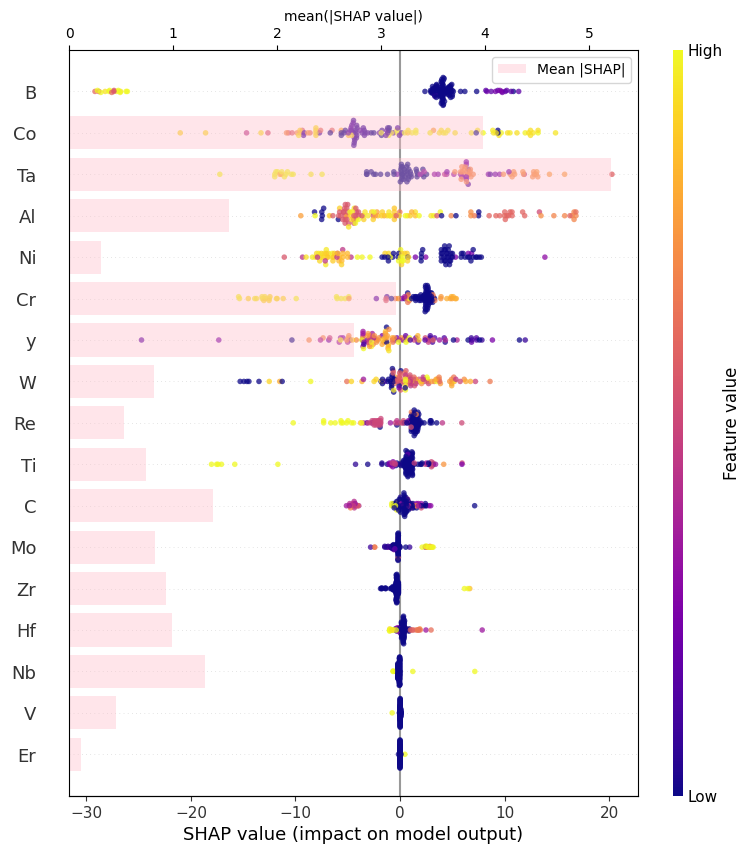

In [12]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 计算 SHAP 值
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(X_train)

# 计算特征的平均 |SHAP| 值
# mean_shap_values = np.absolute(shap_values.mean(axis=0))
# feature_names = X_train.columns

# 创建主图
fig, ax1 = plt.subplots(figsize=(10, 6))

# SHAP summary_plot（蜜蜂图）
shap.summary_plot(shap_values, X_train,show=False,cmap='plasma',alpha=0.75)# max_display=10

# 添加次要 x 轴（bar chart）
ax2 = ax1.twiny()  # 创建次轴
ax2.barh(feature_names, mean_shap_values,color='pink', 
         alpha=0.4, label="Mean |SHAP|")

# 调整两个 x 轴
ax1.set_xlabel("SHAP value (impact on model output)")
ax2.set_xlabel("mean(|SHAP value|)")
ax2.tick_params(axis='x')
# 显示图例
ax2.legend()
plt.show()